In [3480]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3481]:
# create grid with random points in it. Let's do a yashi grid of 12x12

dim = 12
grid = np.matrix(np.zeros((dim,dim)))

# Initialize an empty set to store the generated coordinates
generated_coord = set()

# Generate 10 random coordinates
while len(generated_coord) < dim:
    x = random.randint(0, dim-1)
    y = random.randint(0, dim-1)
    generated_coord.add((x, y))

points = list(generated_coord)

for point in points:
    grid[point[0],point[1]] = 1

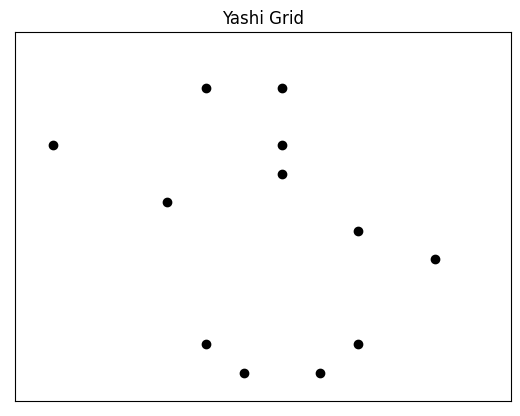

In [3482]:
#draw the grid using matplotlib where 1 is a point and 0 is empty space

x_coords = [point[0] for point in list(generated_coord)]
y_coords = [point[1] for point in list(generated_coord)]

# Create a scatter plot
plt.scatter(x_coords, y_coords, color='black')

plt.title('Yashi Grid')
plt.xlim(-1, dim)
plt.ylim(-1, dim)

#do not show the numbers on the axis
plt.xticks([])
plt.yticks([])

plt.show()

In [3483]:
def is_between(value, lower_bound, upper_bound):
    return lower_bound < value < upper_bound

def check_intersection(line1, line2):
    x1, y1 = line1[0]  # First point of line 1
    x2, y2 = line1[1]  # Second point of line 1
    x3, y3 = line2[0]  # First point of line 2
    x4, y4 = line2[1]  # Second point of line 2

    return (is_between(x1, min(x3, x4), max(x3, x4)) and is_between(y3, min(y1, y2), max(y1, y2))) or (is_between(y1, min(y3, y4), max(y3, y4)) and is_between(x3, min(x1, x2), max(x1, x2)))

def check_overlap(line1, line2):
    x1, y1 = line1[0]
    x2, y2 = line1[1]
    x3, y3 = line2[0]
    x4, y4 = line2[1]

    # Check for horizontal lines
    if y1 == y2 == y3 == y4:
        # Check if they overlap in the x-axis
        if (min(x1,x2) < x3 < max(x1,x2)) or (min(x3,x4) < x1 < max(x3,x4)) or (min(x1,x2) < x4 < max(x1,x2)) or (min(x3,x4) < x2 < max(x3,x4)):
            return True

    # Check for vertical lines
    if x1 == x2 == x3 == x4:
        # Check if they overlap in the y-axis
        if (min(y1,y2) < y3 < max(y1,y2)) or (min(y3,y4) < y1 < max(y3,y4)) or (min(y1,y2) < y4 < max(y1,y2)) or (min(y3,y4) < y2 < max(y3,y4)):
            return True

    # Lines do not overlap
    return False

def is_point_on_line(point, line):
    x, y = point
    (x1, y1), (x2, y2) = line

    # Check if point lies on the line segment
    if (y == y1 and min(x1, x2) < x < max(x1, x2)) or (x == x1 and min(y1, y2) < y < max(y1, y2)):
        return True

    return False

def does_line_intersect_points(new_line, points):
    for point in points:
        if is_point_on_line(point, new_line):
            return True

    return False

In [3484]:
def lines_to_undirected_graph(lines):
    graph = {}

    for line in lines:
        start, end = line

        # Add start point to end point's neighbors
        if end in graph:
            graph[end].append(start)
        else:
            graph[end] = [start]

        # Add end point to start point's neighbors
        if start in graph:
            graph[start].append(end)
        else:
            graph[start] = [end]

    return graph


def has_cycle(lines):

    graph = lines_to_undirected_graph(lines)
    visited = set()
    stack = [lines[-1][0]]

    while stack:
        node = stack.pop()

        if node in visited:
            return True

        visited.add(node)
        # Add unvisited neighbors to the stack
        for neighbor in graph[node]:
            if neighbor not in visited:
                stack.append(neighbor)
    
    return False


In [3485]:
lines = []

for idx_i, i in enumerate(points):
    for idx_j, j in enumerate(points):
        if (i[0] == j[0] or i[1] == j[1]) and idx_i != idx_j:
            new_line = (i, j)
            new_line = tuple(sorted(new_line))
            temp_list = lines + [new_line]
            intersect = False
            if len(lines) != 0:
                if new_line not in lines:
                    if has_cycle(temp_list):
                        #print(temp_list)
                        intersect = True
                        #print('Cycle detected: {} in this list of lines {}'.format(new_line, lines))
                    for line in lines:
                        if check_intersection(new_line, line):
                            intersect = True
                            #print('line intersection: {} with {}'.format(new_line, line))
                            break
                        elif check_overlap(new_line, line):
                            intersect = True
                            #print('overlap: {} with {}'.format(new_line, line))
                            break
                        elif does_line_intersect_points(new_line, points):
                            intersect = True
                            #print('point intersection: {}'.format(new_line))
                            break
                    if not intersect:
                        lines.append(new_line)
            else:
                if not does_line_intersect_points(new_line, points):
                        lines.append(new_line)
                

In [3486]:
def is_solved(lines, points):
    graph = lines_to_undirected_graph(lines)
    visited = set()
    stack = [next(iter(graph.keys()))]  # Start from any arbitrary point

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                stack.append(neighbor)

    if len(visited) == len(points):
        sol = 'solved!'
    else:
        sol = 'not solved :('

    return sol

In [3487]:
#lines =[((10, 2), (10, 9)), ((2, 6), (2, 10)), ((1, 10), (2, 10)), ((4, 2), (4, 6)), ((2, 6), (4, 6)), ((4, 2), (4, 6)), ((2, 2), (4, 2)), ((4, 2), (8, 2)), ((2, 3), (2, 6)), ((2, 2), (2, 3)), ((2, 6), (2, 10)), ((2, 6), (4, 6)), ((2, 3), (2, 6)), ((1, 10), (2, 10)), ((2, 2), (4, 2)), ((2, 2), (2, 3)), ((4, 2), (8, 2))]

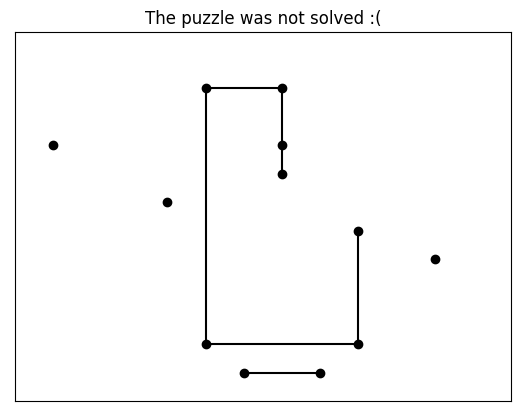

In [3488]:
# Plot the lines and the points

# Get the x and y coordinates of the points with a value of 1

x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# Create a scatter plot
plt.scatter(x_coords, y_coords, color='black')
#for i in points:
#    plt.text(i[0], i[1], '({}, {})'.format(i[0], i[1]), fontsize=9)
    
# Plot the lines
for line in lines:
    x_coords = [line[0][0], line[1][0]]
    y_coords = [line[0][1], line[1][1]]
    plt.plot(x_coords, y_coords, color='black', label='Lines')

    
plt.title('The puzzle was {}'.format(is_solved(lines, points)))
plt.xlim(-1, dim)
plt.ylim(-1, dim)

#do not show the numbers on the axis
plt.xticks([])
plt.yticks([])

plt.show()

In [3489]:
has_cycle([((10, 2), (10, 9)), ((2, 6), (2, 10)), ((1, 10), (2, 10)), ((4, 2), (4, 6)), ((2, 6), (4, 6)), ((4, 2), (4, 6)), ((2, 2), (4, 2)), ((4, 2), (8, 2)), ((2, 3), (2, 6)), ((2, 2), (2, 3)), ((2, 6), (2, 10)), ((2, 6), (4, 6)), ((2, 3), (2, 6)), ((1, 10), (2, 10)), ((2, 2), (4, 2)), ((2, 2), (2, 3)), ((4, 2), (8, 2))])

True